In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.figure_factory._county_choropleth import create_choropleth

In [102]:
# Filepaths

FILEPATH = '../data/results_pct_20201103.txt'
STATE_GEOCODES_PATH = '../data/state-geocodes-v2019.xlsx'
ALL_GEOCODES_PATH = '../data/all-geocodes-v2019.xlsx'


# Plot Color Palette
DEM_COLOR = 'blue'
REP_COLOR = 'red'
LIB_COLOR = 'yellow'
CST_COLOR = 'maroon'
GRE_COLOR = 'green'

DEM_HEX_COLOR = '#0015BC'
REP_HEX_COLOR = '#E9141D'
LIB_HEX_COLOR = '#FED105'
GRE_HEX_COLOR = '#508C1B'
CST_HEX_COLOR = '#C52334'

# Democratic party
DEM_HEX_PALETTE = {
    'color_tint': ["#0015BC", "#1A2CC3", "#3344C9", "#4D5BD0", "#6673D7", "#808ADE", "#99A1E4", "#B3B9EB", "#CCD0F2", "#E6E8F8"], 
    'color_tones': ["#0015BC", "#0D20B6", "#1A2AB0", "#2635AA", "#3340A4", "#404B9E", "#4D5598", "#5A6092", "#666B8C", "#737586"],
    'color_shade': ["#0015BC", "#0013A9", "#001196", "#000F84", "#000D71", "#000B5E", "#00084B", "#000638", "#000426", "#000213"]
}
# Republican party
REP_HEX_PALETTE = {
    'color_tint': ["#E9141D", "#EB2C34", "#ED434A", "#F05B61", "#F27277", "#F48A8E", "#F6A1A5", "#F8B9BB", "#FBD0D2", "#FDE8E8"], 
    'color_tones': ["#E9141D", "#DF1F27", "#D42A31", "#CA343B", "#BF3F45", "#B54A4F", "#AA5558", "#A06062", "#956A6C", "#8B7576"],
    'color_shade': ["#E9141D", "#D2121A", "#BA1017", "#A30E14", "#8C0C11", "#750A0F", "#5D080C", "#460609", "#2F0406", "#170203"]    
}

# Libertarian party
LIB_HEX_PALETTE = {
    'color_tint': ["#FED105", "#FED61E", "#FEDA37", "#FEDF50", "#FEE369", "#FFE882", "#FFED9B", "#FFF1B4", "#FFF6CD", "#FFFAE6"], 
    'color_tones': ["#FED105", "#F1C911", "#E5C11E", "#D8B92A", "#CCB136", "#BFA943", "#B2A04F", "#A6985B", "#999067", "#8D8874"],
    'color_shade': ["#FED105", "#E5BC05", "#CBA704", "#B29204", "#987D03", "#7F6903", "#665402", "#4C3F02", "#332A01", "#191501"]
}

# Green party
GRE_HEX_PALETTE = {
    'color_tint': ["#508C1B", "#629832", "#73A349", "#85AF5F", "#96BA76", "#A8C68D", "#B9D1A4", "#CBDDBB", "#DCE8D1", "#EEF4E8"], 
    'color_tones': ["#508C1B", "#558B25", "#5A8A2F", "#5E8839", "#638743", "#68864E", "#6D8558", "#728462", "#76826C", "#7B8176"],
    'color_shade': ["#508C1B", "#487E18", "#407016", "#386213", "#305410", "#28460E", "#20380B", "#182A08", "#101C05", "#080E03"]     
}

#Constitution party
CST_HEX_PALETTE = {
    'color_tint': ["#C52334", "#CB3948", "#D14F5D", "#D66571", "#DC7B85", "#E2919A", "#E8A7AE", "#EEBDC2", "#F3D3D6", "#F9E9EB"], 
    'color_tones': ["#C52334", "#BE2C3C", "#B73643", "#B03F4B", "#A94852", "#A3525A", "#9C5B62", "#956469", "#8E6D71", "#877778"],
    'color_shade': ["#C52334", "#B1202F", "#9E1C2A", "#8A1924", "#76151F", "#63121A", "#4F0E15", "#3B0B10", "#27070A", "#140405"]    
}


PARTY_CONFIGS = {'DEM': [DEM_HEX_COLOR, DEM_HEX_PALETTE], 
                 'REP': [REP_HEX_COLOR, REP_HEX_PALETTE], 
                 'LIB': [LIB_HEX_COLOR, LIB_HEX_PALETTE], 
                 'GRE': [GRE_HEX_COLOR, GRE_HEX_PALETTE],
                 'CST': [CST_HEX_COLOR, CST_HEX_PALETTE],
                }


# Plot Variables
ENDPTS = [1000, 10000, 100000, 250000, 500000, 1000000]

In [94]:
#Utility Functions
def remove_leading_zero(code):
    if code[0] == '0':
        return code[1:]
    return code

def format_county_codes(code):
    if len(code) < 3:
        return code.zfill(3)
    return code

def format_state_codes(code):
    if len(code) < 2:
        return code.zfill(2)
    return code


In [85]:
results_data = pd.read_csv(FILEPATH, sep='\t')
results_data.head()

County Election Date    Precinct  Contest Group ID Contest Type  \
0      TYRRELL    11/03/2020          14              1005            S   
1  MECKLENBURG    11/03/2020         018                10            C   
2      TYRRELL    11/03/2020          16              1011            S   
3         WAKE    11/03/2020  OSZB 41-80              1309            S   
4        SURRY    11/03/2020          19              1006            S   

                                        Contest Name                  Choice  \
0                                NC ATTORNEY GENERAL              Josh Stein   
1  CITY OF CHARLOTTE TRANSPORTATION BONDS REFERENDUM                      No   
2                  NC COURT OF APPEALS JUDGE SEAT 05  Lora Christine Cubbage   
3                        NC STATE SENATE DISTRICT 18           Jason Loeback   
4                                         NC AUDITOR            Beth A. Wood   

  Choice Party  Vote For  Election Day  One Stop  Absentee by Mail  \
0          DEM         1             5         0                 0   
1                      1            50       186                 0   
2          DEM         1             0         0                 0   
3          LIB         1             0         0                 0   
4          DEM         1            82         0                 0   

   Provisional  Total Votes Real Precinct  
0            0            5             Y  
1            0          236             Y  
2            0            0             Y  
3            0            0             N  
4            0           82             Y

In [8]:
matters = results_data[results_data['Contest Name'].isin(['US PRESIDENT', 'NC GOVERNOR', 'US SENATE'])]
party_colors = {'DEM': DEM_COLOR, 'REP': REP_COLOR, 'LIB': LIB_COLOR, 'CST': CST_COLOR, 'GRE': GRE_COLOR}
matters['Party Color'] = matters['Choice Party'].map(party_colors) 

In [9]:
matters.tail()

County Election Date Precinct  Contest Group ID Contest Type  \
236338     UNION    11/03/2020      024              1373            S   
236356  COLUMBUS    11/03/2020      P10              1374            S   
236361      WAKE    11/03/2020    01-48              1373            S   
236364     MACON    11/03/2020       09              1373            S   
236374      WAKE    11/03/2020    20-16              1373            S   

        Contest Name                    Choice Choice Party  Vote For  \
236338  US PRESIDENT             Howie Hawkins          GRE         1   
236356     US SENATE            Cal Cunningham          DEM         1   
236361  US PRESIDENT             Howie Hawkins          GRE         1   
236364  US PRESIDENT             Howie Hawkins          GRE         1   
236374  US PRESIDENT  Write-In (Miscellaneous)          NaN         1   

        Election Day  One Stop  Absentee by Mail  Provisional  Total Votes  \
236338             1         0                 0            0            1   
236356            40        25                11            0           76   
236361             1         0                 0            0            1   
236364             0         0                 0            0            0   
236374             1         0                 0            0            1   

       Real Precinct Party Color  
236338             Y        gray  
236356             Y        blue  
236361             Y        gray  
236364             Y        gray  
236374             Y         NaN

In [10]:
matters = matters.sort_values(by=['County'])
matters.head()

County Election Date Precinct  Contest Group ID Contest Type  \
115459  ALAMANCE    11/03/2020      124              1373            S   
66417   ALAMANCE    11/03/2020      08S              1373            S   
196948  ALAMANCE    11/03/2020      12N              1169            S   
215841  ALAMANCE    11/03/2020      129              1374            S   
215912  ALAMANCE    11/03/2020      03S              1374            S   

        Contest Name                    Choice Choice Party  Vote For  \
115459  US PRESIDENT  Write-In (Miscellaneous)          NaN         1   
66417   US PRESIDENT             Howie Hawkins          GRE         1   
196948   NC GOVERNOR                Roy Cooper          DEM         1   
215841     US SENATE            Cal Cunningham          DEM         1   
215912     US SENATE               Thom Tillis          REP         1   

        Election Day  One Stop  Absentee by Mail  Provisional  Total Votes  \
115459             1         3                 0            0            4   
66417              2         1                 1            0            4   
196948           379      1194               266            0         1839   
215841            65       302               144            0          511   
215912           387      1815               311            0         2513   

       Real Precinct Party Color  
115459             Y         NaN  
66417              Y        gray  
196948             Y        blue  
215841             Y        blue  
215912             Y         red

## Total Votes by Party - US PRESIDENT 

In [11]:
total_votes_party_president = matters[matters['Contest Name'] == 'US PRESIDENT'].groupby(['Contest Group ID', 'Choice', 'Choice Party', 'Party Color'])['Total Votes'].sum().reset_index().sort_values(by=['Total Votes'], ascending=False)
total_votes_party_president

Contest Group ID           Choice Choice Party Party Color  Total Votes
1              1373  Donald J. Trump          REP         red      2732084
4              1373  Joseph R. Biden          DEM        blue      2655383
3              1373     Jo Jorgensen          LIB       green        47215
2              1373    Howie Hawkins          GRE        gray        11825
0              1373  Don Blankenship          CST      yellow         7381

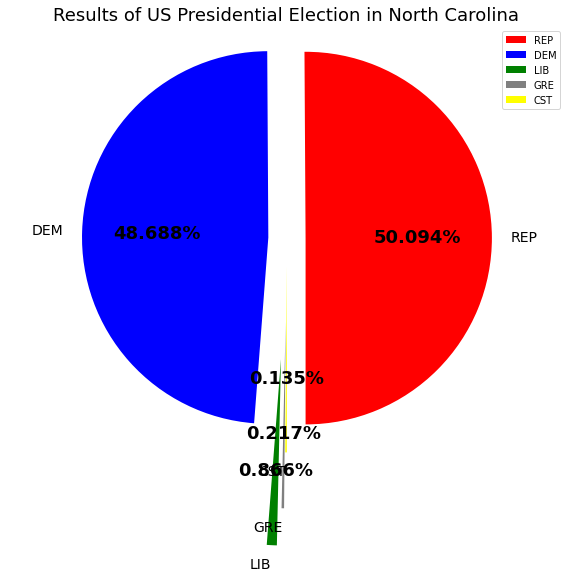

In [98]:
labels = list(total_votes_party_president['Choice Party'])
colors = list(total_votes_party_president['Party Color'])
explode = (0.1, 0.1, 0.65, 0.45, 0.15) 

fig1, ax1 = plt.subplots(figsize=[10,10])

patches, texts, autotexts = ax1.pie(total_votes_party_president['Total Votes'], explode=explode, labels=labels, colors= colors
                          , autopct='%1.3f%%', shadow=False, startangle=270)

for text in texts:
    text.set(fontsize=14)

for autotext in autotexts:
    autotext.set(color='black', fontsize=18, weight='bold', ha='center')

plt.title('Results of US Presidential Election in North Carolina', fontsize=18)
ax1.axis('equal')
plt.legend()

plt.show()

## Total Votes by Party - NC GOVERNOR

In [13]:
total_votes_party_governor = matters[matters['Contest Name'] == 'NC GOVERNOR'].groupby(['Contest Group ID', 'Choice', 'Choice Party', 'Party Color'])['Total Votes'].sum().reset_index().sort_values(by=['Total Votes'], ascending=False)
total_votes_party_governor

Contest Group ID             Choice Choice Party Party Color  Total Votes
2              1169         Roy Cooper          DEM        blue      2803782
1              1169         Dan Forest          REP         red      2563258
3              1169  Steven J. DiFiore          LIB       green        58818
0              1169          Al Pisano          CST      yellow        20371

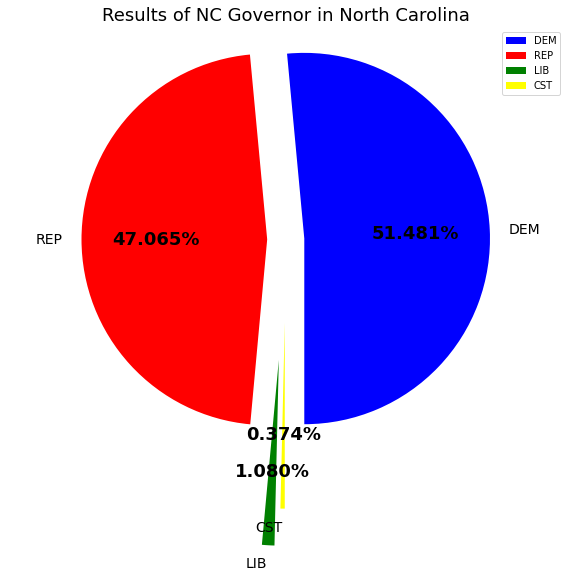

In [95]:
labels = list(total_votes_party_governor['Choice Party'])
colors = list(total_votes_party_governor['Party Color'])
explode = (0.1, 0.1, 0.65, 0.45) 

fig1, ax1 = plt.subplots(figsize=[10,10])

patches, texts, autotexts = ax1.pie(total_votes_party_governor['Total Votes'], explode=explode, labels=labels, colors= colors
                          , autopct='%1.3f%%', shadow=False, startangle=270)

for patch in patches:
    patch.set_animated(True)

for text in texts:
    text.set(fontsize=14)

for autotext in autotexts:
    autotext.set(color='black', fontsize=18, weight='bold', ha='center')

plt.title('Results of NC Governor in North Carolina', fontsize=18)
ax1.axis('equal')
plt.legend()

plt.show()

## REFERENCE DATASETS -  FIPS Data  

In [33]:
state_geocodes = pd.read_excel(STATE_GEOCODES_PATH, header=0, skiprows=5)
all_geocodes = pd.read_excel(ALL_GEOCODES_PATH, header=0, skiprows=4)

all_geocodes['state_fips_codes'] = all_geocodes['State Code (FIPS)'].map(lambda x : format_state_codes(str(x)))
all_geocodes['county_fips_codes'] = all_geocodes['County Code (FIPS)'].map(lambda x : format_county_codes(str(x)))
all_geocodes['combined_fips_code'] = all_geocodes['state_fips_codes'] + all_geocodes['county_fips_codes']
all_geocodes.reindex(columns=['combined_fips_codes'])

# Create a Fips Map for County
fips_ref_data = all_geocodes.loc[:,['Area Name (including legal/statistical area description)', 'state_fips_codes', 'county_fips_codes', 'combined_fips_code']]
fips_ref_data.columns = ['area_name', 'state_fips_codes', 'county_fips_codes', 'combined_fips_code' ]
fips_ref_data = fips_ref_data[fips_ref_data['area_name'].map(lambda area: 'County' in area)]
fips_ref_data['county_name'] = fips_ref_data['area_name'].map(lambda county: county.split(' ')[0].upper())


# Create a Map for state code to state name
state_fips_codes_map = all_geocodes[(all_geocodes['State Code (FIPS)'] != 0) & (all_geocodes['County Code (FIPS)'] == 0) & (all_geocodes['County Subdivision Code (FIPS)'] == 0) & 
             (all_geocodes['Place Code (FIPS)'] == 0) & (all_geocodes['Consolidtated City Code (FIPS)'] == 0)].loc[:, ['State Code (FIPS)', 'Area Name (including legal/statistical area description)']]
state_fips_codes_map.columns = ['state_fips_code', 'state_name']
state_fips_codes_map['state_fips_code'] = state_fips_codes_map['state_fips_code'].map(lambda x: str(format_state_codes(str(x))))
state_fips = state_fips_codes_map.set_index('state_fips_code')['state_name'].to_dict()
fips_ref_data['state_name'] = fips_ref_data['state_fips_codes'].map(lambda state: state_fips[state])
state_fips_modified = dict((v,k) for k,v in state_fips.items())

In [34]:
print(state_fips_modified)

{'Alabama': '01', 'Alaska': '02', 'Arizona': '04', 'Arkansas': '05', 'California': '06', 'Colorado': '08', 'Connecticut': '09', 'Delaware': '10', 'District of Columbia': '11', 'Florida': '12', 'Georgia': '13', 'Hawaii': '15', 'Idaho': '16', 'Illinois': '17', 'Indiana': '18', 'Iowa': '19', 'Kansas': '20', 'Kentucky': '21', 'Louisiana': '22', 'Maine': '23', 'Maryland': '24', 'Massachusetts': '25', 'Michigan': '26', 'Minnesota': '27', 'Mississippi': '28', 'Missouri': '29', 'Montana': '30', 'Nebraska': '31', 'Nevada': '32', 'New Hampshire': '33', 'New Jersey': '34', 'New Mexico': '35', 'New York': '36', 'North Carolina': '37', 'North Dakota': '38', 'Ohio': '39', 'Oklahoma': '40', 'Oregon': '41', 'Pennsylvania': '42', 'Rhode Island': '44', 'South Carolina': '45', 'South Dakota': '46', 'Tennessee': '47', 'Texas': '48', 'Utah': '49', 'Vermont': '50', 'Virginia': '51', 'Washington': '53', 'West Virginia': '54', 'Wisconsin': '55', 'Wyoming': '56', 'Puerto Rico': '72'}


In [35]:
fips_ref_data.head()

area_name state_fips_codes county_fips_codes combined_fips_code  \
2  Autauga County               01               001              01001   
3  Baldwin County               01               003              01003   
4  Barbour County               01               005              01005   
5     Bibb County               01               007              01007   
6   Blount County               01               009              01009   

  county_name state_name  
2     AUTAUGA    Alabama  
3     BALDWIN    Alabama  
4     BARBOUR    Alabama  
5        BIBB    Alabama  
6      BLOUNT    Alabama

## Total Votes by Party per County - US PRESIDENT

In [21]:
fips = fips_ref_data[fips_ref_data['state_fips_codes'] == state_fips_modified['North Carolina']].loc[:, ['county_name', 'combined_fips_code']]
fips.head()

county_name combined_fips_code
25560    ALAMANCE              37001
25561   ALEXANDER              37003
25562   ALLEGHANY              37005
25563       ANSON              37007
25564        ASHE              37009

In [36]:
total_votes_by_county_president = matters[matters['Contest Name'] == 'US PRESIDENT'].groupby(['County', 'Choice Party', 'Party Color'])['Total Votes'].sum().reset_index().sort_values(by=['County', 'Total Votes'], ascending=False)
total_votes_by_county_president['state_name'] = 'North Carolina'
total_votes_by_county_president.head()

County Choice Party Party Color  Total Votes      state_name
499  YANCEY          REP         red         7481  North Carolina
496  YANCEY          DEM        blue         3678  North Carolina
498  YANCEY          LIB       green           78  North Carolina
497  YANCEY          GRE        gray           27  North Carolina
495  YANCEY          CST      yellow           18  North Carolina

In [116]:
total_votes_by_county_president_enriched = pd.merge(total_votes_by_county_president, fips_ref_data, how='left', left_on=['County', 'state_name'], right_on=['county_name', 'state_name'])
total_votes_by_county_president_enriched.head()

County Choice Party Party Color  Total Votes      state_name  \
0  YANCEY          REP         red         7481  North Carolina   
1  YANCEY          DEM        blue         3678  North Carolina   
2  YANCEY          LIB       green           78  North Carolina   
3  YANCEY          GRE        gray           27  North Carolina   
4  YANCEY          CST      yellow           18  North Carolina   

       area_name state_fips_codes county_fips_codes combined_fips_code  \
0  Yancey County               37               199              37199   
1  Yancey County               37               199              37199   
2  Yancey County               37               199              37199   
3  Yancey County               37               199              37199   
4  Yancey County               37               199              37199   

  county_name  
0      YANCEY  
1      YANCEY  
2      YANCEY  
3      YANCEY  
4      YANCEY

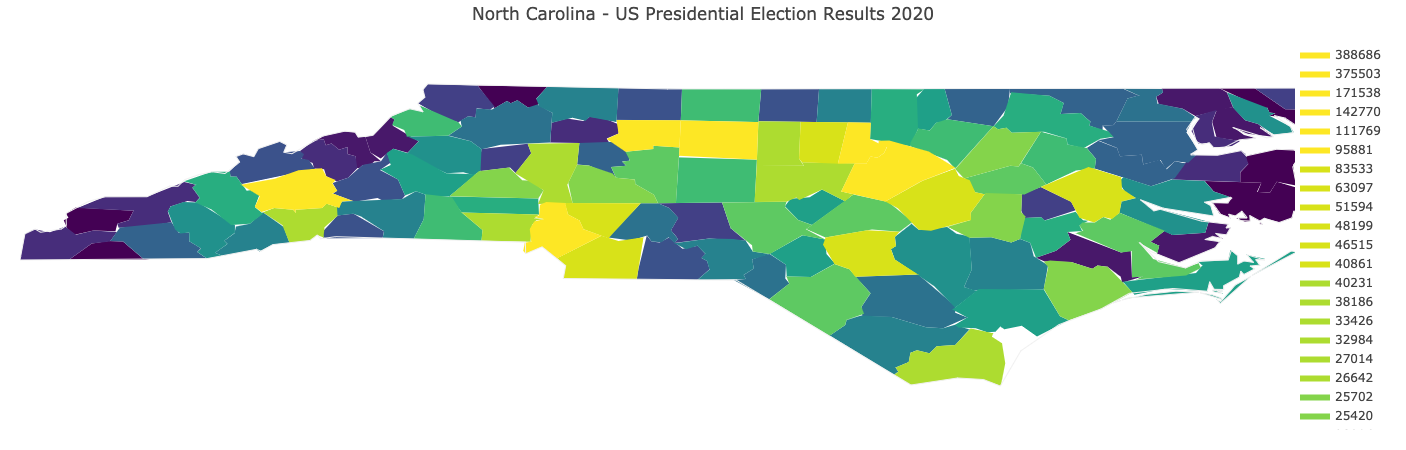

In [25]:

# df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
# df_sample_r = df_sample[df_sample['STNAME'] == 'North Carolina']

values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'DEM']['Total Votes']
# fips = total_votes_by_county_president_enriched['combined_fips_code']

fips=total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'DEM']['combined_fips_code']

# colorscale = [
#     'rgb(193, 193, 193)',
#     'rgb(239,239,239)',
#     'rgb(195, 196, 222)',
#     'rgb(144,148,194)',
#     'rgb(101,104,168)',
#     'rgb(65, 53, 132)'
# ]

fig = create_choropleth(
    fips=fips, values=values, scope=['NC'], title='North Carolina - US Presidential Election Results 2020'
)

# fig = create_choropleth(
#     fips=fips, values=values, scope=['NC'],
#     binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
#     legend_title='Population by County', title='California and Nearby States'
# )
fig.layout.template = None
fig.show()

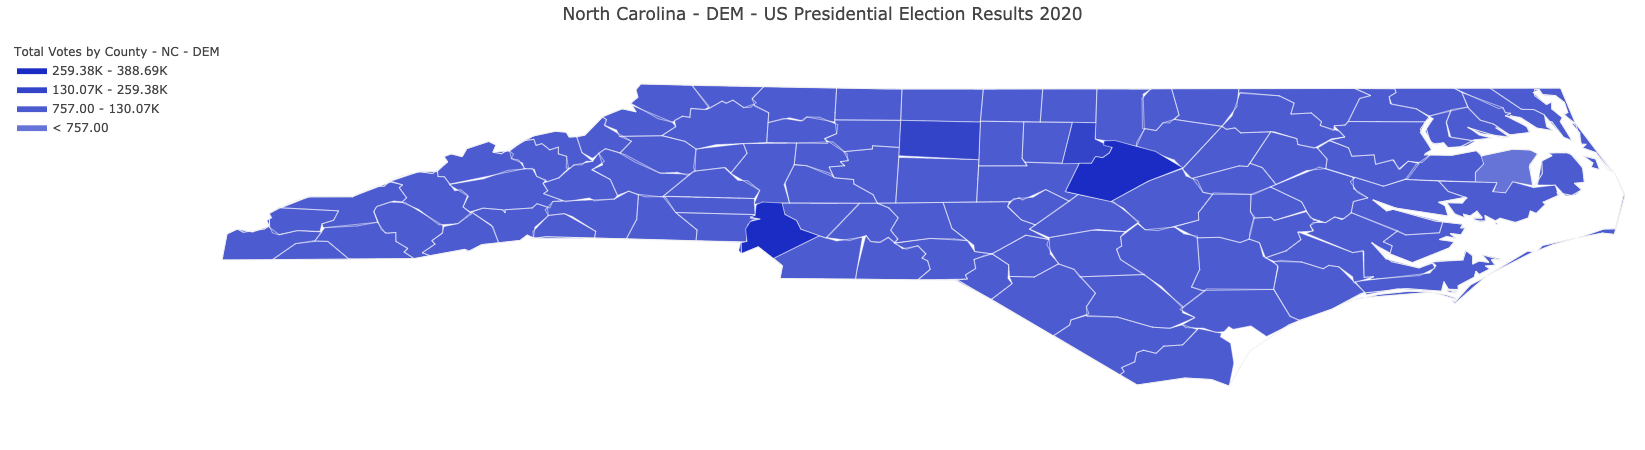

In [58]:
# Democratic Vote - US President

PARTY = 'DEM'

values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == PARTY]['Total Votes']
fips = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == PARTY]['combined_fips_code']


endpts = list(np.mgrid[min(values):max(values):4j])
#colorscale = ["#CCD0F2","#99A1E4","#6673D7","#1A2CC3","#0015BC"]
colorscale = (PARTY_CONFIGS[PARTY][1]['color_tint'][: len(endpts) + 1])[::-1]

fig = create_choropleth(
    fips=fips, values=values, scope=['North Carolina'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    title=f'North Carolina - {PARTY} - US Presidential Election Results 2020',
#     county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True
)


fig.update_layout(
    legend_title=f'Total Votes by County - NC - {PARTY}',
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)



fig.layout.template = None
fig.show()

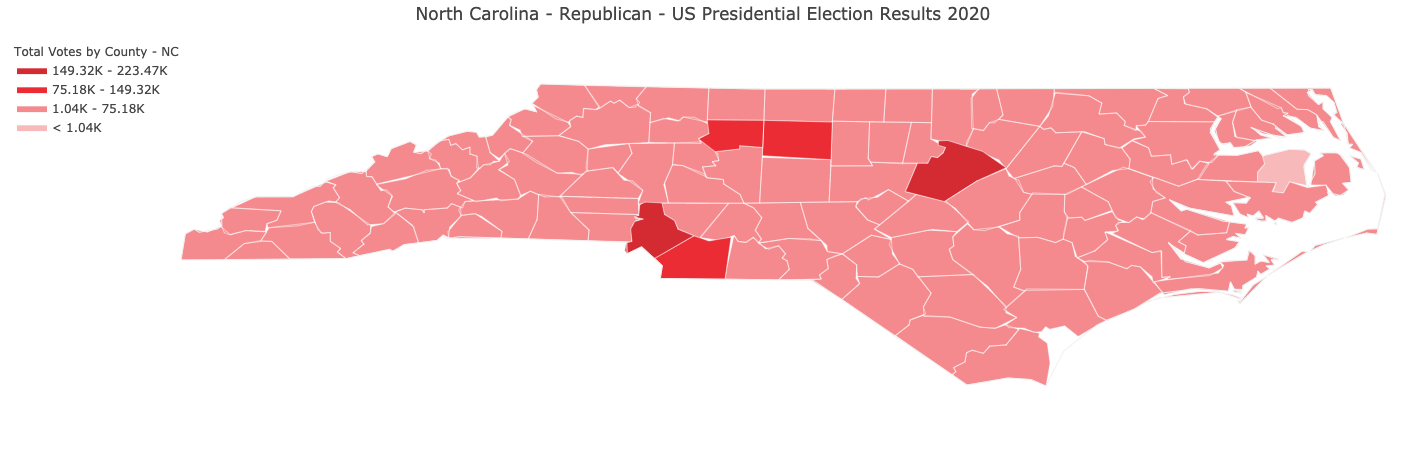

In [27]:
# Republican Vote - US President

values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'REP']['Total Votes']
fips = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'REP']['combined_fips_code']


endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#F8B9BB", "#F48A8E","#EB2C34", "#D42A31", "#E9141D"]
fig = create_choropleth(
    fips=fips, values=values, scope=['North Carolina'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
    title='North Carolina - Republican - US Presidential Election Results 2020',
#     county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True
)


fig.update_layout(
    legend_title='Total Votes by County - NC',
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)



fig.layout.template = None
fig.show()

In [28]:
total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['County']=='WILSON']

County Choice Party Party Color  Total Votes      state_name  \
10  WILSON          DEM        blue        20579  North Carolina   
11  WILSON          REP         red        19437  North Carolina   
12  WILSON          LIB       green          242  North Carolina   
13  WILSON          GRE        gray           55  North Carolina   
14  WILSON          CST      yellow           39  North Carolina   

        area_name state_fips_codes county_fips_codes combined_fips_code  \
10  Wilson County               37               195              37195   
11  Wilson County               37               195              37195   
12  Wilson County               37               195              37195   
13  Wilson County               37               195              37195   
14  Wilson County               37               195              37195   

   county_name  
10      WILSON  
11      WILSON  
12      WILSON  
13      WILSON  
14      WILSON

In [29]:
total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'].isin(['DEM', 'REP'])]
# Work on windowing functions to extract the party with highest votes per county

County Choice Party Party Color  Total Votes      state_name  \
0       YANCEY          REP         red         7481  North Carolina   
1       YANCEY          DEM        blue         3678  North Carolina   
5       YADKIN          REP         red        15861  North Carolina   
6       YADKIN          DEM        blue         3744  North Carolina   
10      WILSON          DEM        blue        20579  North Carolina   
..         ...          ...         ...          ...             ...   
481  ALLEGHANY          DEM        blue         1480  North Carolina   
485  ALEXANDER          REP         red        15806  North Carolina   
486  ALEXANDER          DEM        blue         4113  North Carolina   
490   ALAMANCE          REP         red        45490  North Carolina   
491   ALAMANCE          DEM        blue        38186  North Carolina   

            area_name state_fips_codes county_fips_codes combined_fips_code  \
0       Yancey County               37               199              37199   
1       Yancey County               37               199              37199   
5       Yadkin County               37               197              37197   
6       Yadkin County               37               197              37197   
10      Wilson County               37               195              37195   
..                ...              ...               ...                ...   
481  Alleghany County               37               005              37005   
485  Alexander County               37               003              37003   
486  Alexander County               37               003              37003   
490   Alamance County               37               001              37001   
491   Alamance County               37               001              37001   

    county_name  
0        YANCEY  
1        YANCEY  
5        YADKIN  
6        YADKIN  
10       WILSON  
..          ...  
481   ALLEGHANY  
485   ALEXANDER  
486   ALEXANDER  
490    ALAMANCE  
491    ALAMANCE  

[198 rows x 10 columns]

In [109]:
def generate_countywise_results(party, ENDPTS):
    PARTY = party

    values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == PARTY]['Total Votes']
    fips = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == PARTY]['combined_fips_code']
    endpts = ENDPTS
    colorscale = (PARTY_CONFIGS[PARTY][1]['color_tint'][: len(endpts) + 1])[::-1]

    fig = create_choropleth(
        fips=fips, values=values, scope=['North Carolina'], show_state_data=True,
        colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
        title=f'North Carolina - {PARTY} - US Presidential Election Results 2020',
    #     county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        exponent_format=True
    )


    fig.update_layout(
        legend_title = f'Total Votes by County - NC - {PARTY}',
        legend_x = 0,
        annotations = {'x': -0.12, 'xanchor': 'left'}
    )



    fig.layout.template = None
    #fig.show()
    
    return fig

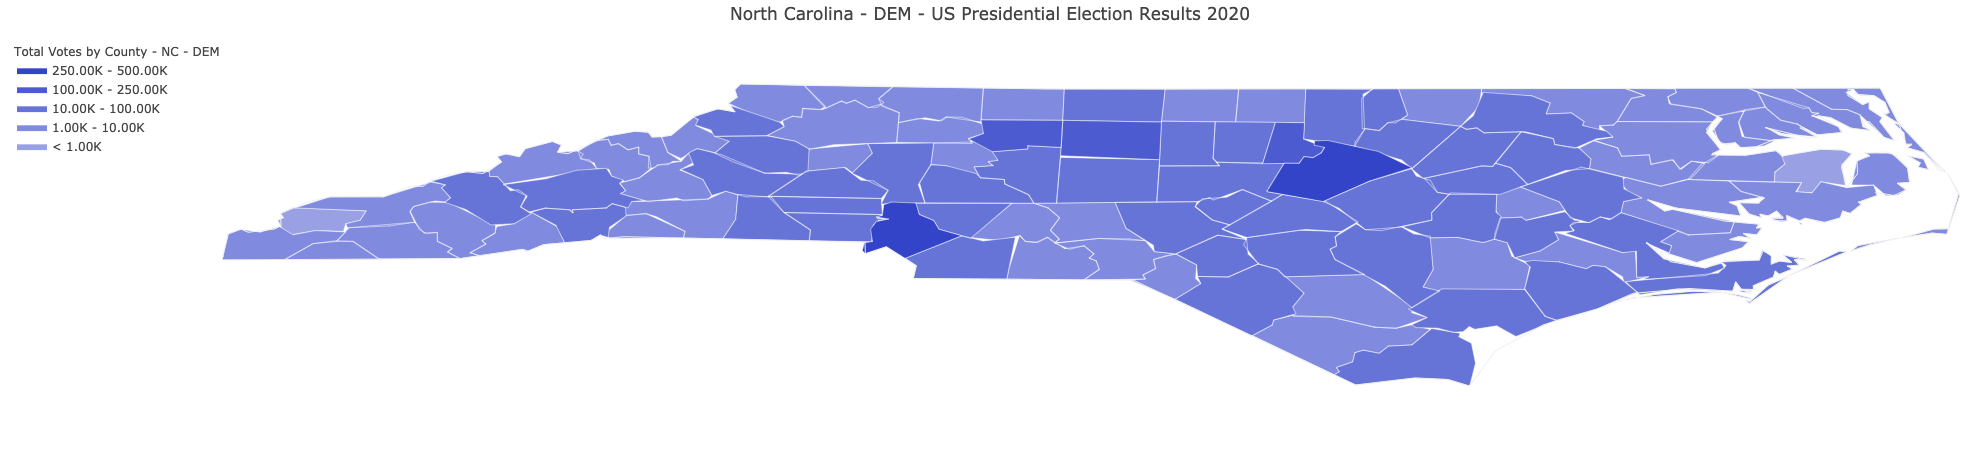

In [115]:
fig_dem = generate_countywise_results('DEM', ENDPTS)
fig_dem.show()

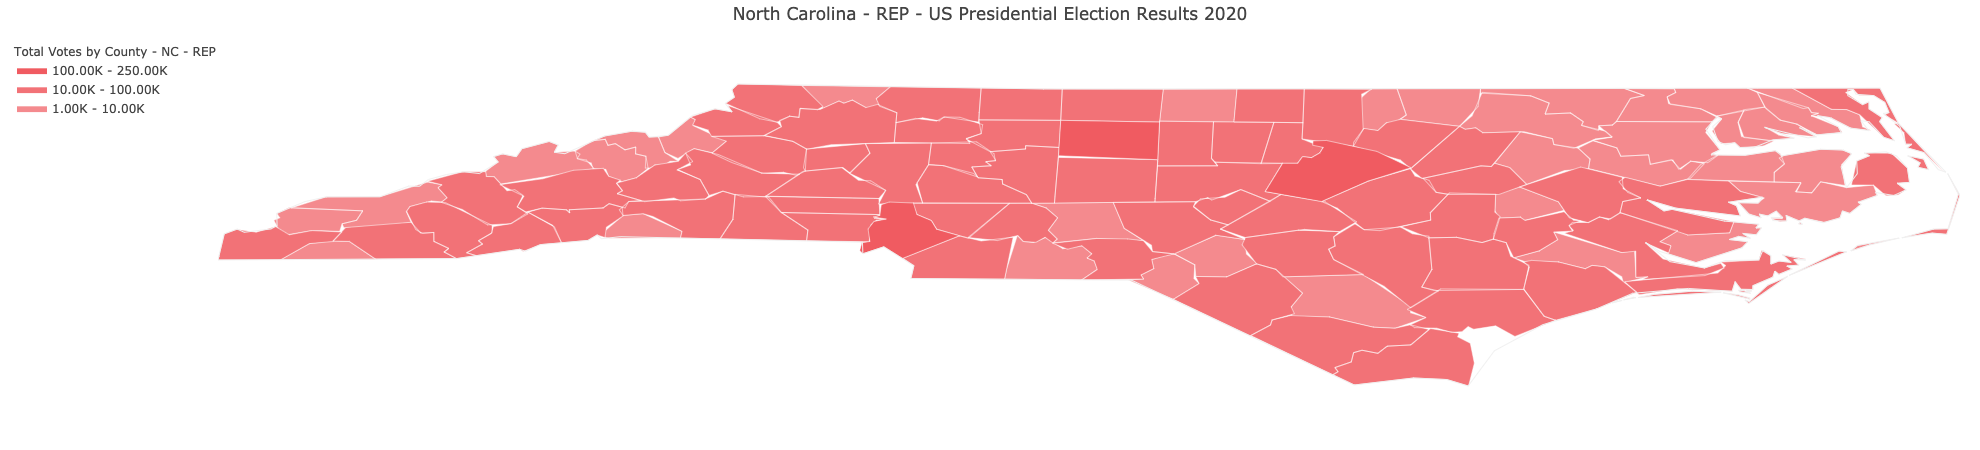

In [111]:
generate_countywise_results('REP', ENDPTS)

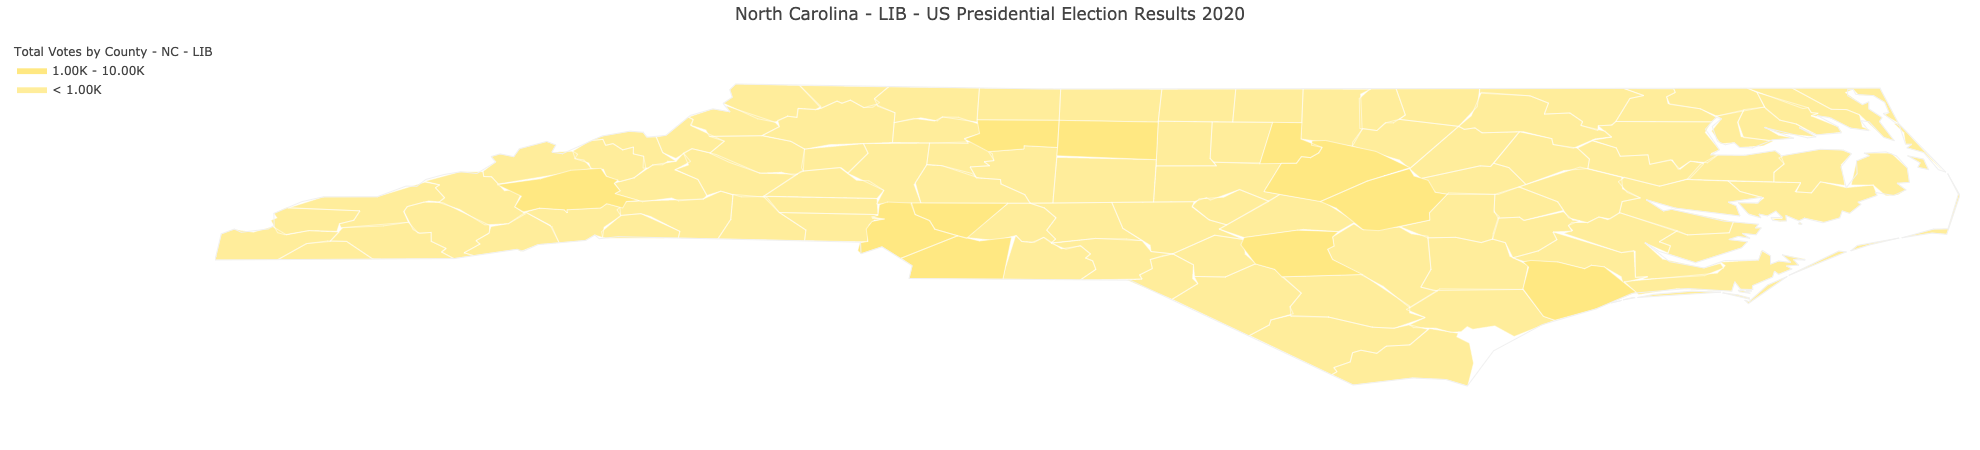

In [112]:
generate_countywise_results('LIB', ENDPTS)

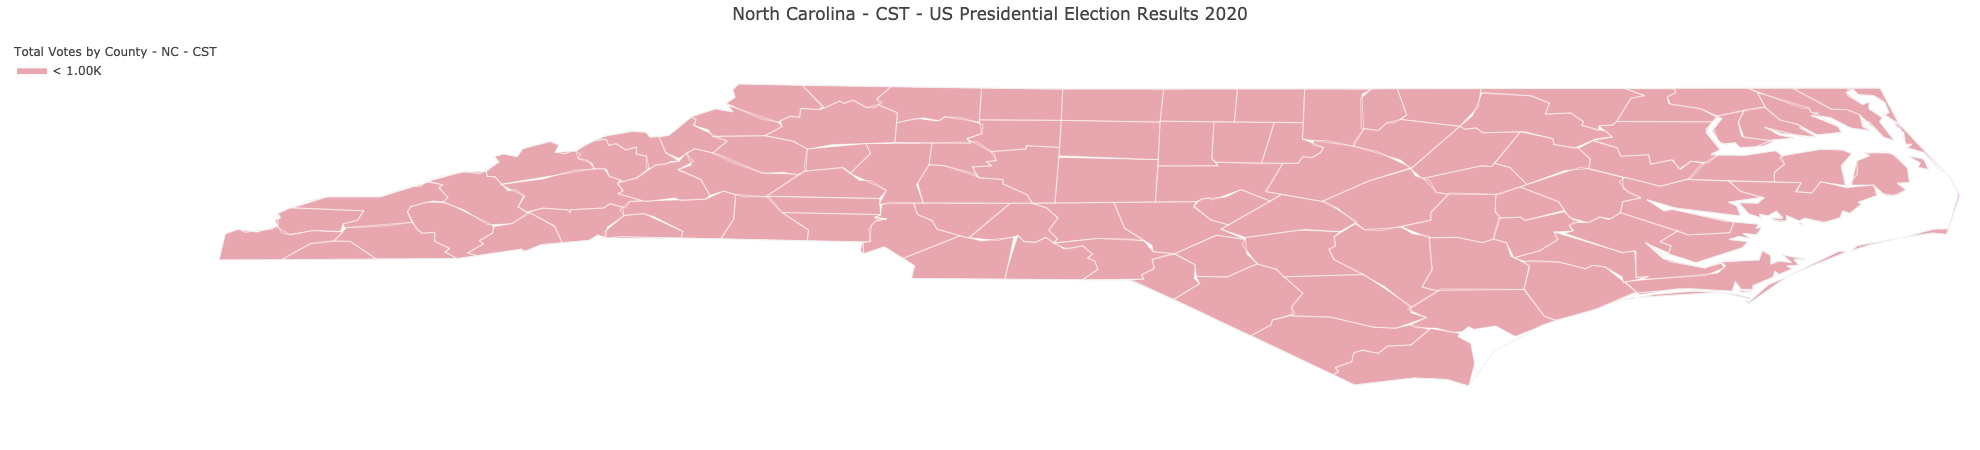

In [113]:
generate_countywise_results('CST', ENDPTS)

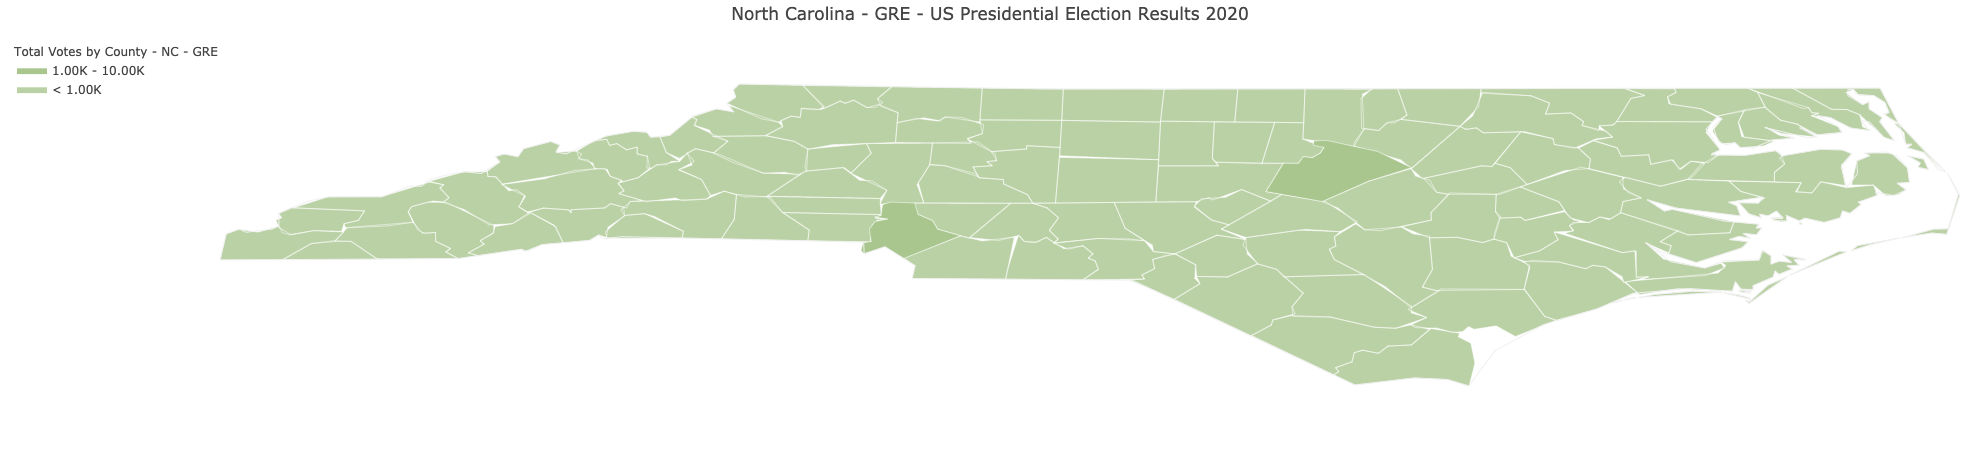

In [114]:
generate_countywise_results('GRE', ENDPTS)